In [2]:
import pandas as pd

df = pd.read_csv("Breast_Cancer.csv")

1. What is the distribution of malignant vs benign cases?
Most cases in the dataset are benign, but a significant proportion are malignant. This can be visualized using a count plot.

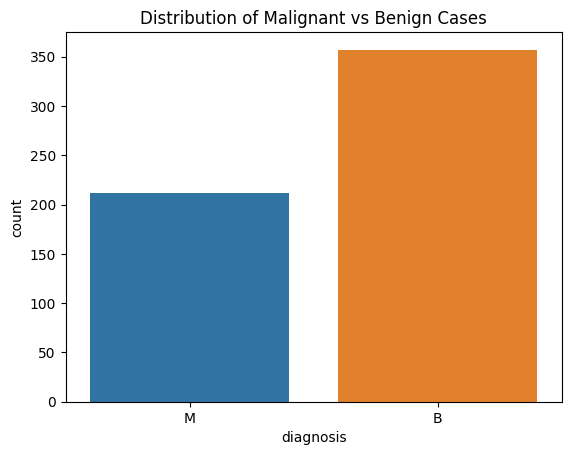

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='diagnosis', data=df, hue='diagnosis')
plt.title('Distribution of Malignant vs Benign Cases')
plt.show()

2. Which features differ the most between malignant and benign tumors?
Features like radius_mean, texture_mean, and area_mean show clear differences between malignant and benign tumors, as seen in their boxplots.

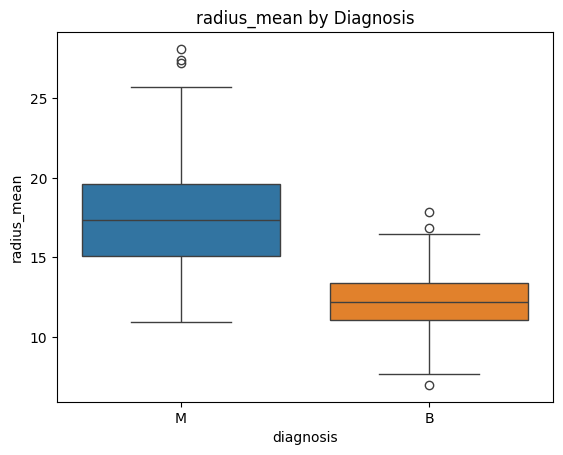

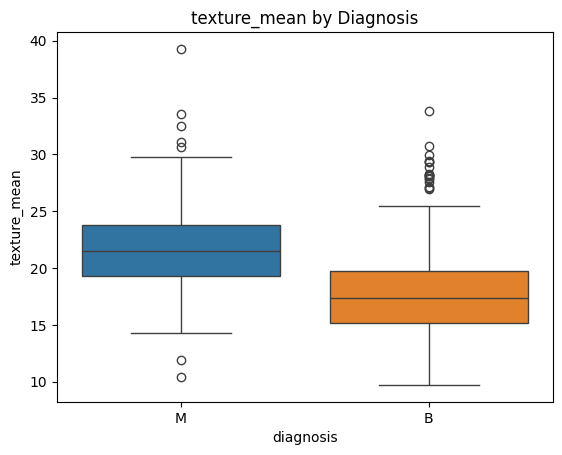

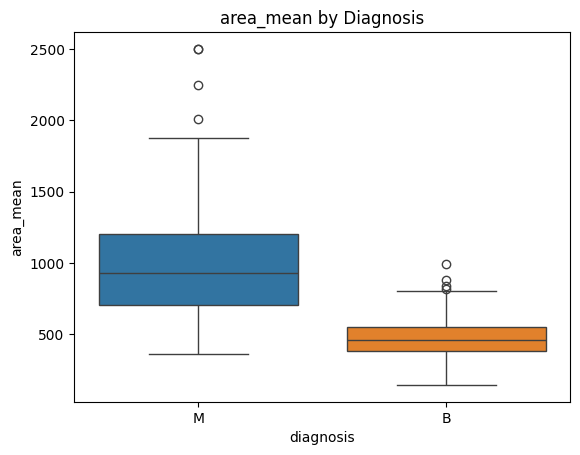

In [11]:
features = ['radius_mean', 'texture_mean', 'area_mean']
for feature in features:
    sns.boxplot(x='diagnosis', y=feature, data=df, hue='diagnosis')
    plt.title(f'{feature} by Diagnosis')
    plt.show()

3. Is there a strong correlation between radius, perimeter, and area?
Radius, perimeter, and area are highly correlated, as shown by the correlation heatmap.

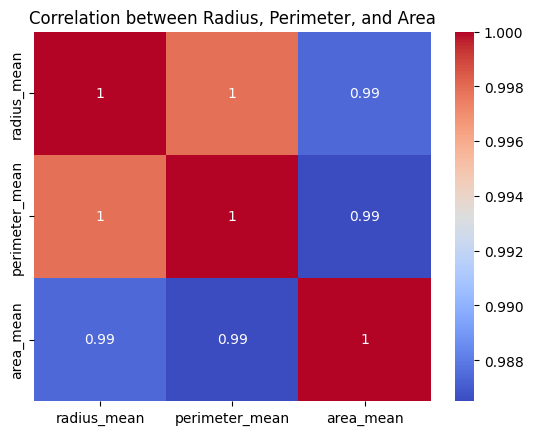

In [12]:
corr = df[['radius_mean', 'perimeter_mean', 'area_mean']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Radius, Perimeter, and Area')
plt.show()

4. Which features are most useful in distinguishing malignant from benign?
Concavity_mean and smoothness_mean are useful for distinguishing between classes, as shown by their violin plots.

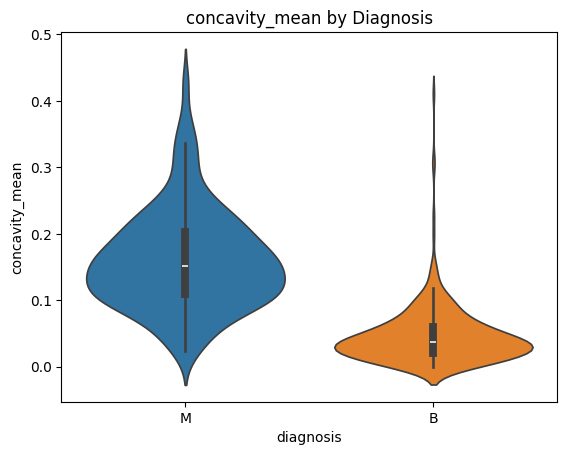

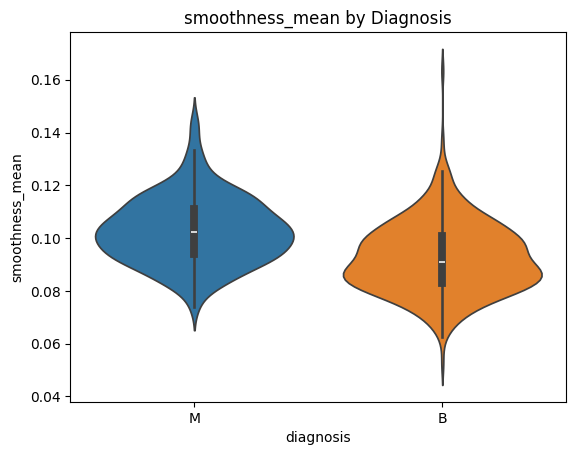

In [13]:
features = ['concavity_mean', 'smoothness_mean']
for feature in features:
    sns.violinplot(x='diagnosis', y=feature, data=df, hue='diagnosis')
    plt.title(f'{feature} by Diagnosis')
    plt.show()

5. How do "worst" features compare to "mean" features in classification power?
Worst features often show greater separation between classes than mean features, indicating higher classification power.

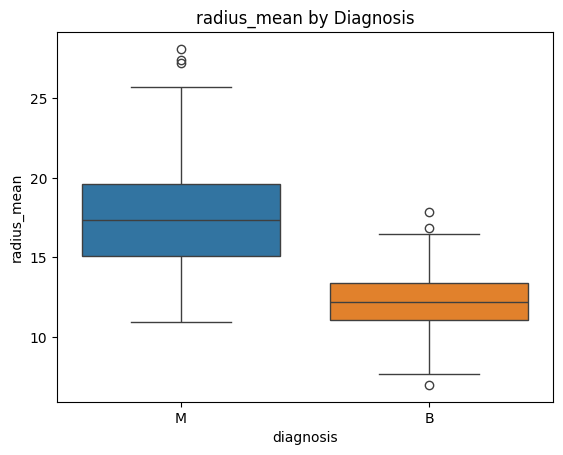

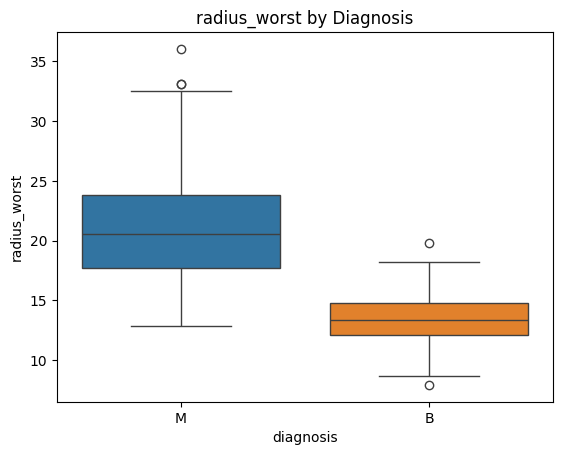

In [14]:
features = ['radius_mean', 'radius_worst']
for feature in features:
    sns.boxplot(x='diagnosis', y=feature, data=df, hue='diagnosis')
    plt.title(f'{feature} by Diagnosis')
    plt.show()

6. Are there multicollinearity issues among features?
Some features are highly correlated, indicating multicollinearity. This can be seen in the correlation heatmap.

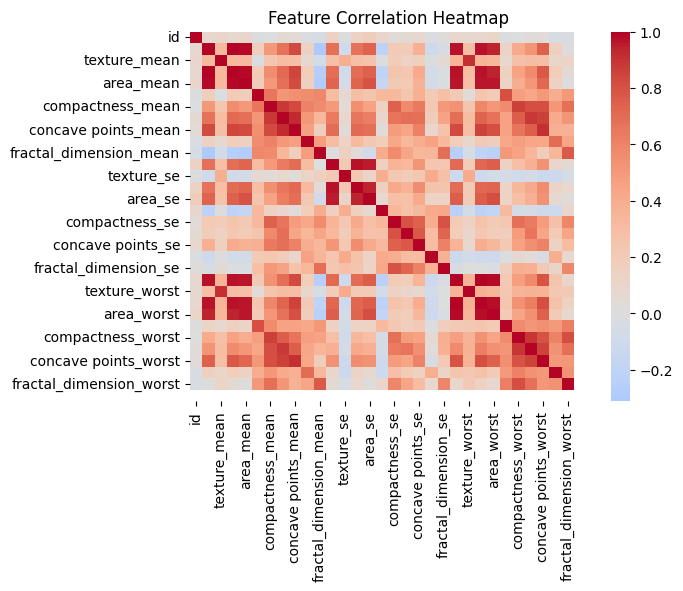

In [16]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

7. Which top 5 features show the largest separation between malignant and benign tumors?
The top 5 features with the largest separation are radius_worst, perimeter_worst, area_worst, concave_points_worst, and concavity_worst.

In [18]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


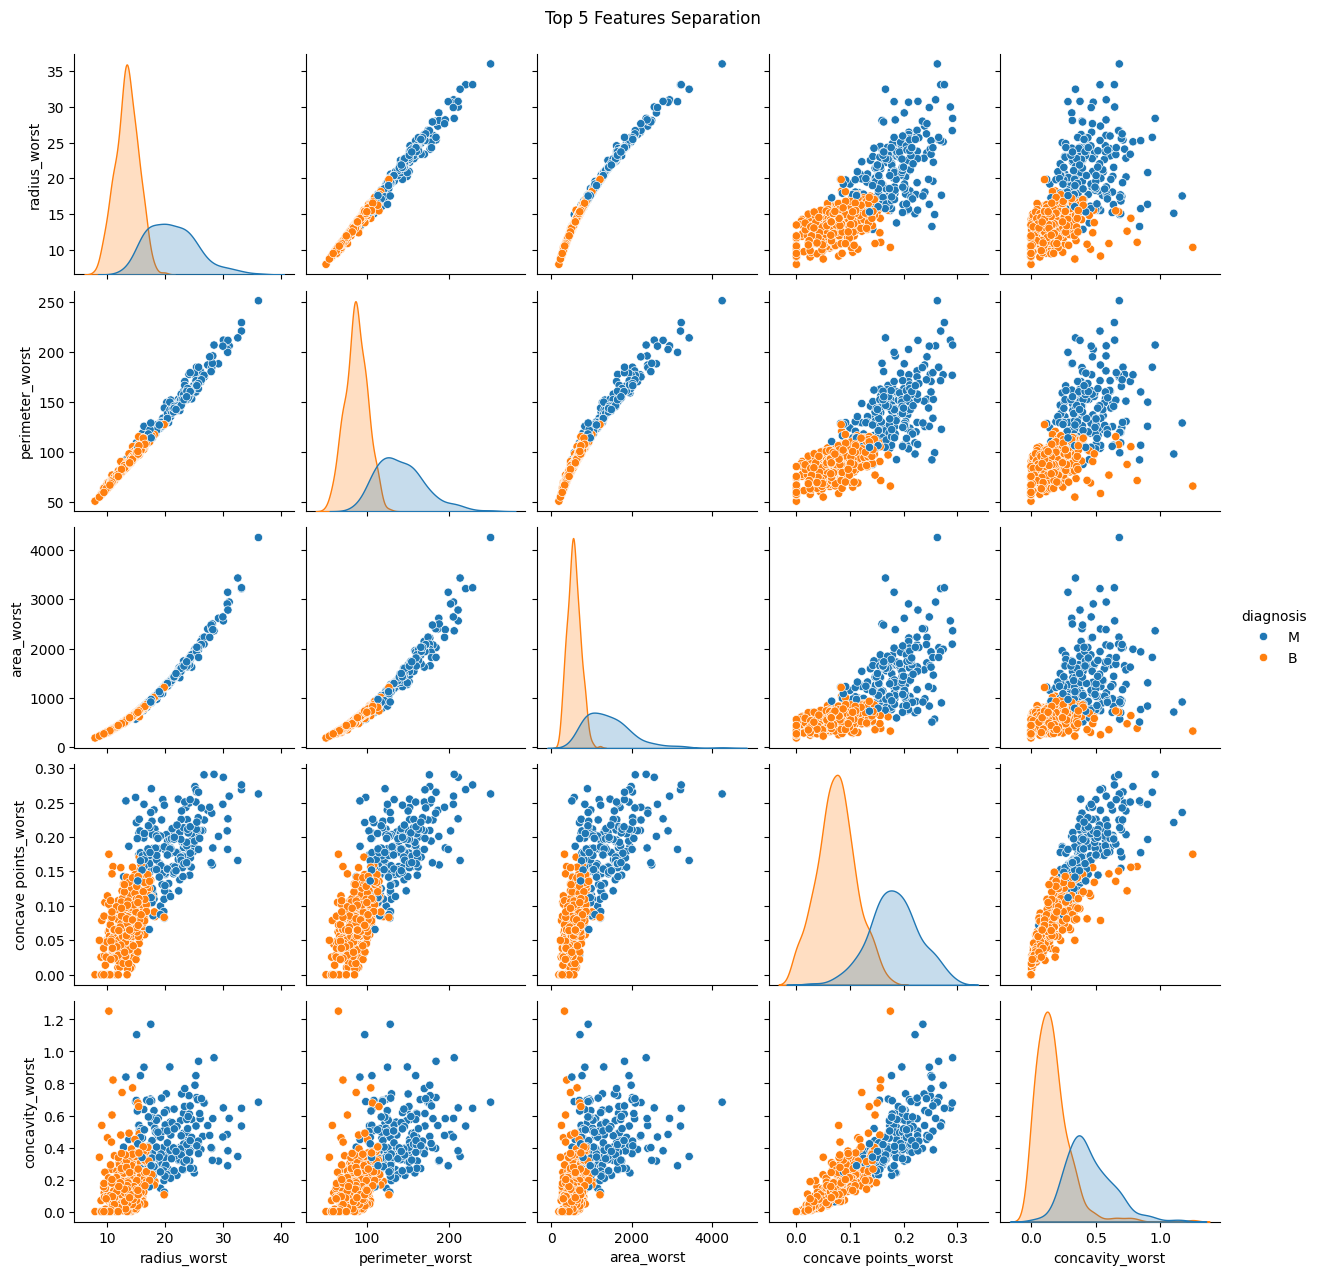

In [19]:
top_features = ['radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst', 'concavity_worst']
sns.pairplot(df, vars=top_features, hue='diagnosis')
plt.suptitle('Top 5 Features Separation', y=1.02)
plt.show()

8. What is the average tumor size (radius/area) for malignant vs benign?
Malignant tumors tend to have larger average radius and area compared to benign tumors.

In [ ]:
avg_size = df.groupby('diagnosis')[['radius_mean', 'area_mean']].mean()
print(avg_size)
avg_size.plot(kind='bar', color=['crimson', 'mediumseagreen'])
plt.title('Average Tumor Size by Diagnosis')
plt.ylabel('Mean Value')
plt.show()

9. Are there any outliers in the dataset? How might they affect classification?
There are some outliers in area and radius, which could affect classification by skewing model results.

In [ ]:
for feature in ['area_mean', 'radius_mean']:
    sns.boxplot(x='diagnosis', y=feature, data=df, hue='diagnosis')
    plt.title(f'Outliers in {feature}')
    plt.show()

11. Which features show the highest variance, and do they contribute to classification?
Features with high variance, such as area_worst and radius_worst, contribute significantly to distinguishing between classes.

In [ ]:
variances = df.var().sort_values(ascending=False)
print(variances.head(10))
sns.barplot(x=variances.index[:10], y=variances.values[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Feature Variances')
plt.show()

12. How does texture differ between malignant and benign tumors?
Malignant tumors tend to have higher texture_mean and texture_worst values, as shown by their distributions.

In [ ]:
for feature in ['texture_mean', 'texture_worst']:
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True)
    plt.title(f'{feature} Distribution by Diagnosis')
    plt.show()

13. Do tumors with higher concavity tend to be malignant?
Tumors with higher concavity_mean are more likely to be malignant, as shown by the distribution plot.

In [ ]:
sns.violinplot(x='diagnosis', y='concavity_mean', data=df, hue='diagnosis')
plt.title('Concavity Mean by Diagnosis')
plt.show()

14. What is the relationship between smoothness and compactness?
Smoothness and compactness are positively correlated, and their relationship can be visualized with a scatter plot colored by diagnosis.

In [ ]:
sns.scatterplot(x='smoothness_mean', y='compactness_mean', hue='diagnosis', data=df)
plt.title('Smoothness vs Compactness by Diagnosis')
plt.show()

15. Which class tends to have higher values of fractal dimension?
Malignant tumors tend to have slightly higher fractal_dimension_mean values compared to benign tumors.

In [ ]:
sns.violinplot(x='diagnosis', y='fractal_dimension_mean', data=df, hue='diagnosis')
plt.title('Fractal Dimension Mean by Diagnosis')
plt.show()